# Project: Predict Passenger Satisfaction in the Airline Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions From EDA</a></li>
<li> <a href="#modelTraining">Model Training and Evaluation</a></li>
<li> <a href="#tuning">Hyperparameter Tuning</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The aviation competition is growing as airlines attempt to acquire and retain customers. The change in airline passengers' behavior following the pandemic crisis, travel restrictions, the ensuing economic crisis, market liberalization, high technology, and reorganization has resulted in airline services. Airlines can quickly and effectively adapt and change the market in such a competitive environment, which is crucial to the highly competitive aviation industry's success.
>
> The goal of this project is to train an evaluate a classification machine learning model to predict passenger satisfaction using a number of features.

### Data Desciption 

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Age: The actual age of the passengers

Gender: Gender of the passengers (Female, Male)

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Customer Type: The customer type (Loyal customer, disloyal customer)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking: Satisfaction level of online booking

Inflight service: Satisfaction level of inflight service

Online boarding: Satisfaction level of online boarding

Inflight entertainment: Satisfaction level of inflight entertainment

Food and drink: Satisfaction level of Food and drink

Seat comfort: Satisfaction level of Seat comfort

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Baggage handling: Satisfaction level of baggage handling

Gate location: Satisfaction level of Gate location

Cleanliness: Satisfaction level of Cleanliness

Check-in service: Satisfaction level of Check-in service

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Flight cancelled: Whether the Flight cancelled or not (Yes, No)

Flight time in minutes: Minutes of Flight takes

In [33]:
# importing the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,accuracy_score

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# importing the dataset with pandas
df_train = pd.read_csv('airline_train_dataset.csv')
df_train.head()

Age  Flight Distance  Inflight wifi service  \
0   35              971                      3   
1   32             1092                      0   
2   46             2915                      0   
3   56             2556                      4   
4   54              468                      1   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       5              4   
1                                  0                       0              3   
2                                  5                       0              5   
3                                  4                       4              4   
4                                  4                       1              4   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               2                3             3                       2  ...   
1               1                0             1                       1  ...   
2               3                4             5                       1  ...   
3               4                4             4                       3  ...   
4               4                1             4                       4  ...   

   Departure Delay in Minutes  Arrival Delay in Minutes  Gender_Female  \
0                         373                     358.0              0   
1                           0                       0.0              0   
2                           0                       0.0              1   
3                          19                      18.0              0   
4                           0                       0.0              0   

   Gender_Male  Type of Travel_Business travel  \
0            1                               1   
1            1                               1   
2            0                               1   
3            1                               1   
4            1                               0   

   Type of Travel_Personal Travel  Class_Business  Class_Eco  Class_Eco Plus  \
0                               0               0          1               0   
1                               0               0          1               0   
2                               0               1          0               0   
3                               0               1          0               0   
4                               1               0          1               0   

              satisfaction  
0  neutral or dissatisfied  
1                satisfied  
2                satisfied  
3                satisfied  
4  neutral or dissatisfied  

[5 rows x 26 columns]

### Data Cleaning (Replace this with more specific notes!)

In [4]:
# checking for info on the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50761 entries, 0 to 50760
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                50761 non-null  int64  
 1   Flight Distance                    50761 non-null  int64  
 2   Inflight wifi service              50761 non-null  int64  
 3   Departure/Arrival time convenient  50761 non-null  int64  
 4   Ease of Online booking             50761 non-null  int64  
 5   Gate location                      50761 non-null  int64  
 6   Food and drink                     50761 non-null  int64  
 7   Online boarding                    50761 non-null  int64  
 8   Seat comfort                       50761 non-null  int64  
 9   Inflight entertainment             50761 non-null  int64  
 10  On-board service                   50761 non-null  int64  
 11  Leg room service                   50761 non-null  int

<a id='eda'></a>
## Exploratory Data Analysis


### What is the Distribution of our Target Variable?

In [5]:
# setting base color for our plots
base_color = sns.color_palette()[0]
# setting style for our plots
sns.set_style('whitegrid')

In [6]:
# creating a function to do count plots
def countplot(x,data,title,color=base_color,hue=None):
    order = data[x].value_counts().index
    xlabel = x.upper()
    ylabel = 'COUNT'
    sns.countplot(x=x,data=data,color=color,hue=hue,order=order)
    plt.title(f'DISTRIBUTION OF {title.upper()}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if hue:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else: plt.show()

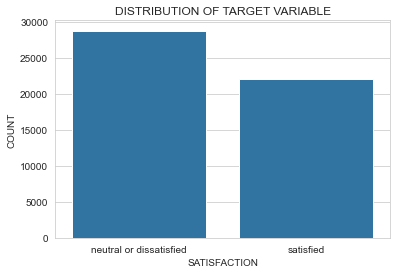

In [7]:
countplot('satisfaction',df_train,'target variable')

We can see our dataset is not highly imbalanced between the two possible classes.

### What is the Distribution of Age in our Dataset?

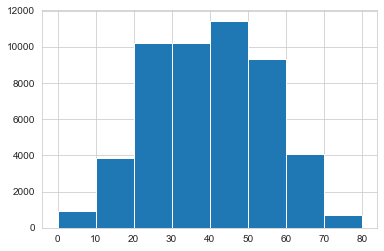

In [8]:
# plotting a histogram to show the distribution of age in our dataset
bins = np.arange(0,df_train.Age.max(),10)
plt.hist(df_train['Age'],bins=bins);

Most of the passengers fall between the 40 to 50 range, followed by the 20 to 40 then the 50 to 60.

### What is the Distribution of Gender in our Dataset?

In [9]:
# create a gender column by combining the gender_male & gender_female columns
df_train['gender'] = df_train['Gender_Male'].astype('str') + df_train['Gender_Female'].astype('str')
display(df_train['gender'].unique())
df_train['gender'] = df_train['gender'].replace({'10':'male','01':'female'})
display(df_train['gender'].unique())

NumExpr defaulting to 8 threads.


array(['10', '01'], dtype=object)

array(['male', 'female'], dtype=object)

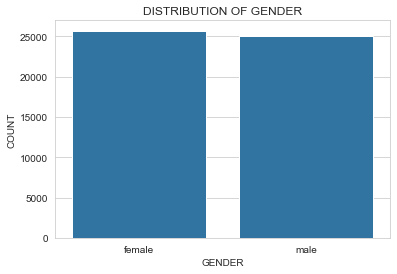

In [10]:
# using a count plot to show male and female distribution
countplot('gender',df_train,'gender')

We can see that gender is almost evenly distributed across the dataset

### What is the distribution of flight distance?

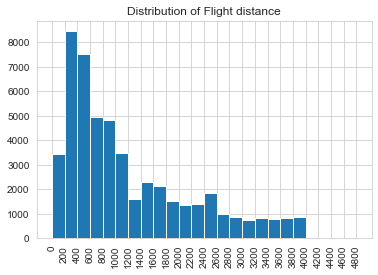

In [11]:
# plotting a histogram to show the distribution of age in our dataset
bins = np.arange(0,df_train['Flight Distance'].max(),200)
ticks = [v for v in bins]
plt.hist(df_train['Flight Distance'],bins=bins)
plt.xticks(ticks,rotation=90)
plt.title('Distribution of Flight distance');

Most of the flight distances fall between 200 to 400 

### What distribution of online boarding satisfaction level?

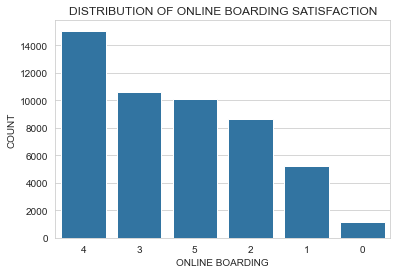

In [12]:
countplot(x='Online boarding',data=df_train,title='Online boarding satisfaction')

We can see that most of the passangers picked the second highest satisfaction rating.

### Checking the effect of age on the target variable

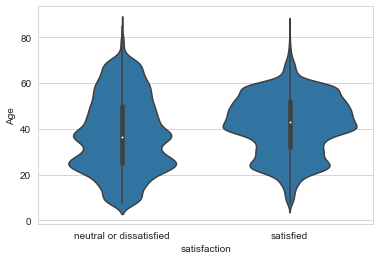

In [13]:
# using a violin plot with satisfaction as hue
sns.violinplot(y='Age',x='satisfaction',data=df_train,color=base_color);

 The satisfied passangers are slighly older on avareage but not by a significant margin.

### Checking the effect of flight distance on the target variable

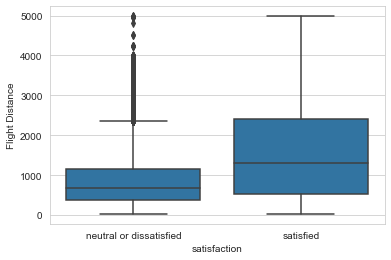

In [14]:
# using a violin plot with satisfaction as hue
sns.boxplot(y='Flight Distance',x='satisfaction',data=df_train,color=base_color);

Satisfied passangers have longer flight distances on average.

### Checking the effect of gender

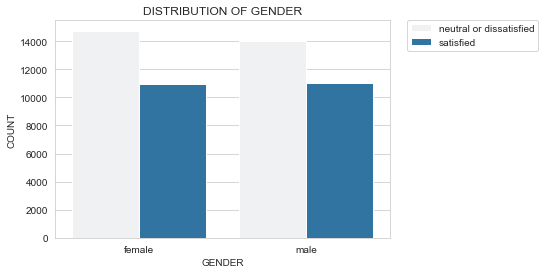

In [15]:
countplot('gender',df_train,'gender',hue='satisfaction');

Slightly more females are satisfied, but again it is not by a significant margin.

### Checking for the effect of online boarding satisfaction

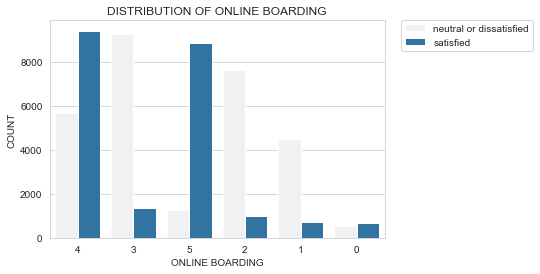

In [16]:
countplot('Online boarding',df_train,'Online boarding',hue='satisfaction');

We can see for passagers with 4 and 5 online boarding satisfaction ratings, most of were satisfied with the flight. This was the opposite with passages from ratings of 3 and below except the 0 ratings.

### Using a heatmap to see corrolations with our target variable

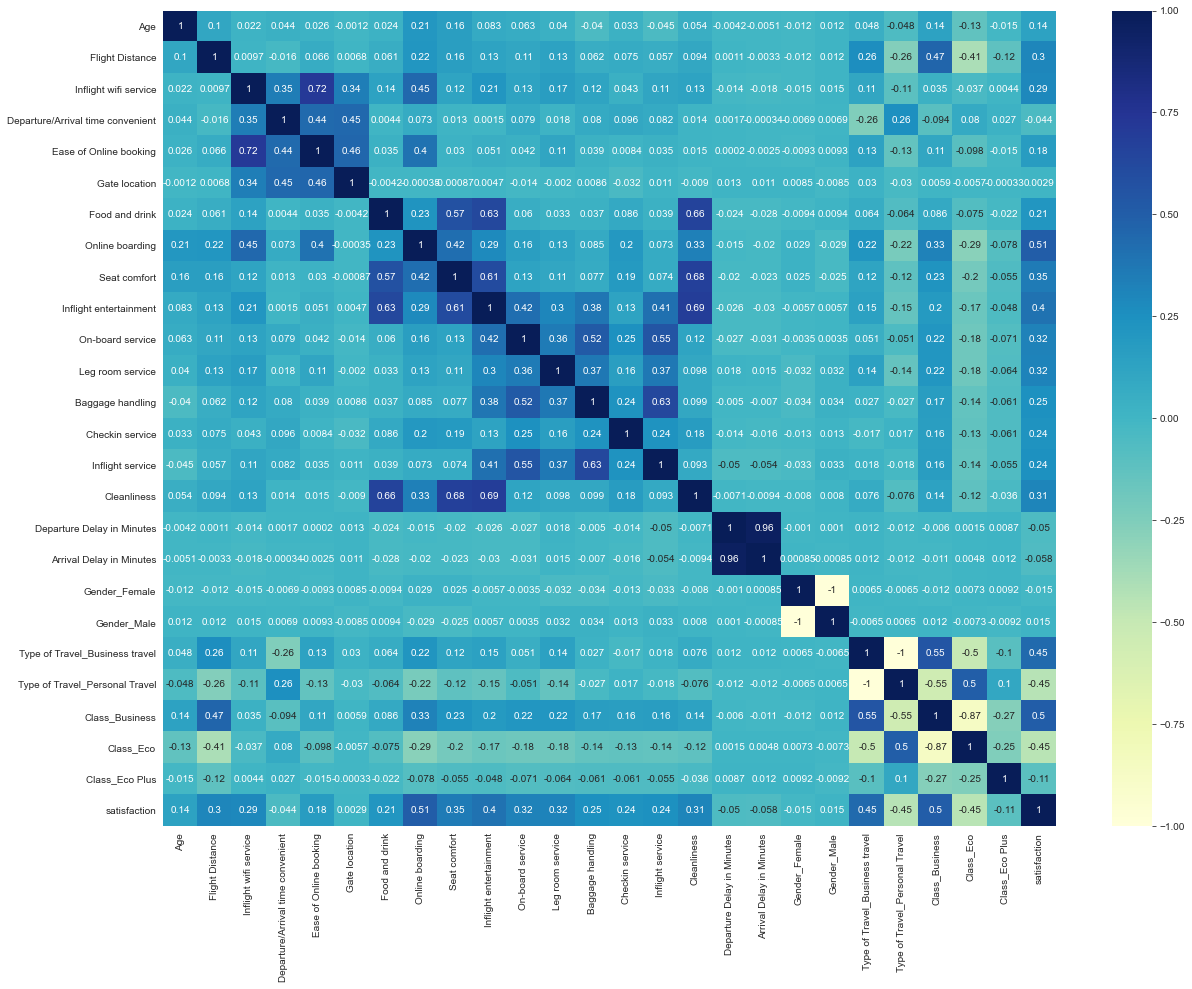

In [17]:
# using a heat map to check for corrolation
df_train.satisfaction = np.where(df_train.satisfaction == 'satisfied',1,0) # encoding our label column
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),cmap="YlGnBu",annot=True);

Online boarding satisfaction score has the highest corrolation with our target variable.

<a id='conclusions'></a>
## Conclusions from EDA

The following was observed from our exploration:
* There are more neutral or dissatisfied customers in our dataset but it is not highly imbalanced between the two possible classes.
* Most of the passengers fall between the 40 to 50 range, followed by the 20 to 40 then the 50 to 60.
* Gender is almost evenly distributed across the dataset.
* The satisfied passangers are slighly older on avareage but not by a significant margin.
* Slightly more females are satisfied, but again it is not by a significant margin.
* For passagers with 4 and 5 online boarding satisfaction ratings, most of were satisfied with the flight. This was the opposite with passages from ratings of 3 and below except the 0 ratings.
* Online boarding satisfaction score has the highest corrolation with our target variable.

<a id='modelTraining'></a>
### Model Training and Evaluation

In [18]:
# dropping columns not needed for our modeling
drop = ['Gender_Female','Type of Travel_Personal Travel','gender','Class_Eco Plus'] 
df_train.drop(drop,axis=1,inplace=True)

In [19]:
# spliting the target and independent variables
df_train_y = df_train['satisfaction']
df_train_x = df_train.drop('satisfaction',axis=1)
display(df_train_x.head())
display(df_train_y.head())

Age  Flight Distance  Inflight wifi service  \
0   35              971                      3   
1   32             1092                      0   
2   46             2915                      0   
3   56             2556                      4   
4   54              468                      1   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       5              4   
1                                  0                       0              3   
2                                  5                       0              5   
3                                  4                       4              4   
4                                  4                       1              4   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               2                3             3                       2  ...   
1               1                0             1                       1  ...   
2               3                4             5                       1  ...   
3               4                4             4                       3  ...   
4               4                1             4                       4  ...   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 3                3                 1            3   
1                 1                1                 2            1   
2                 1                4                 1            3   
3                 4                4                 3            4   
4                 5                3                 4            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  Gender_Male  \
0                         373                     358.0            1   
1                           0                       0.0            1   
2                           0                       0.0            0   
3                          19                      18.0            1   
4                           0                       0.0            1   

   Type of Travel_Business travel  Class_Business  Class_Eco  
0                               1               0          1  
1                               1               0          1  
2                               1               1          0  
3                               1               1          0  
4                               0               0          1  

[5 rows x 22 columns]

0    0
1    1
2    1
3    1
4    0
Name: satisfaction, dtype: int32

In [20]:
# spliting our test data so we can have something to evaluate our model
X_train,X_test,y_train,y_test = train_test_split(df_train_x,df_train_y,test_size=0.2,random_state=10)
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(40608, 22)

(40608,)

(10153, 22)

(10153,)

In [21]:
# normalizing our data with StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

### GaussianNB Classifier

In [22]:
# creating a classier object
clf = GaussianNB()
# training our model
clf.fit(X_train_scaled,y_train)

GaussianNB()

In [23]:
# evaluate our model
pred = clf.predict(X_test_scaled)
print(f'The GaussianNB Classifier gave us an accuracy of {round(accuracy_score(y_test,pred)*100,2)}%\n')
print(classification_report(y_test,pred))

The GaussianNB Classifier gave us an accuracy of 84.85%

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5714
           1       0.83      0.82      0.83      4439

    accuracy                           0.85     10153
   macro avg       0.85      0.85      0.85     10153
weighted avg       0.85      0.85      0.85     10153



### Logistic Regression Model

In [24]:
# create classifier object
lr = LogisticRegression()
# train our algorithm
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
# evaluate our model 
lr_pred = lr.predict(X_test_scaled)
print(f'The Logistic regression model gave us an accuracy of {round(accuracy_score(y_test,lr_pred)*100,2)}%\n')
print(classification_report(y_test,lr_pred))

The Logistic regression model gave us an accuracy of 85.73%

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5714
           1       0.85      0.82      0.83      4439

    accuracy                           0.86     10153
   macro avg       0.86      0.85      0.85     10153
weighted avg       0.86      0.86      0.86     10153



### Support Vector Machines

In [26]:
# create classifier object
svm_clf = svm.SVC()
# train our model
svm_clf.fit(X_train_scaled,y_train)

SVC()

In [27]:
# evaluate our model
svm_pred = svm_clf.predict(X_test_scaled)

print(f'The Simple vector machine model gave us an accuracy of {round(accuracy_score(y_test,svm_pred)*100,2)}%\n')
print(classification_report(y_test,svm_pred))

The Simple vector machine model gave us an accuracy of 94.41%

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5714
           1       0.95      0.92      0.93      4439

    accuracy                           0.94     10153
   macro avg       0.95      0.94      0.94     10153
weighted avg       0.94      0.94      0.94     10153



SVM has been our best performing model with the train data, let's try using GridSearchCV to do hyperparameter tuning and improve performance.

<a id='tuning'></a>
### Hyperparameter Tuning

In [29]:
# stating our parameters and initiating our grid object
params = {'C':np.linspace(0.5,10,10),'kernel':('rbf','linear')}
svc = svm.SVC()
grid = GridSearchCV(svc,param_grid=params)

In [30]:
# fitting our grid object with the train data
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.5       ,  1.55555556,  2.61111111,  3.66666667,  4.72222222,
        5.77777778,  6.83333333,  7.88888889,  8.94444444, 10.        ]),
                         'kernel': ('rbf', 'linear')})

In [32]:
#checking for best parameters and score
display(grid.best_params_)
display(grid.best_score_)

{'C': 7.888888888888889, 'kernel': 'rbf'}

0.9469069780296968

In [59]:
# create classifier object with best parameters
svm_clf = svm.SVC(C=7.89,kernel='rbf')
# train our model
svm_clf.fit(X_train_scaled,y_train)

SVC(C=7.89)

In [60]:
# importing our unlabeled dataset
df_test = pd.read_csv('airline_test_dataset.csv')
df_test.head()
# droping unnecessary columns
drop = ['Gender_Female','Type of Travel_Personal Travel','Class_Eco Plus']
df_test.drop(drop,axis=1,inplace=True)

In [61]:
# scale our test df
df_test_scaled = scale.fit_transform(df_test)

In [65]:
# make our predictions
prediction = svm_clf.predict(df_test_scaled)
prediction

array([1, 0, 1, ..., 0, 1, 0])

In [66]:
# saving the predictions as a csv file
prediction = pd.DataFrame(data=prediction,columns=['satisfaction'])

In [67]:
prediction.to_csv('prediction.csv',index=None)

### Conclusion

We were able to predict satisfaction of airline passangers with a 95% accuracy after using hyperparameter tuning on our Support Vector Machines model.